In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env

In [2]:
# import time
# start = time.time()


# count = 0
# actions = [0]*6
# fail = [0]*6
# different_states = []
# for j in tqdm(range(1000)):
#     en = solitaire_env.env()
#     for i in range(10000):

#         action = random.sample(range(6),1)[0]
        
#         actions[action]+=1

#         won,failed = en.step(action)
        
#         if failed:
#             fail[action]+=1
#         #print(i+1,action,won)
#         if won == True:
#             count+=1
#             break
#     different_states.append(len(en.hashable_map.keys()))

# print(count)
#print(time.time()-start)

In [3]:
#en.get_pile()

In [4]:
#en.get_foundation()

In [5]:
#en.get_tableau()

In [8]:

start = time.time()


count = 0

number_of_games = 800

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games

def greedy_policy(en,action_number,tot,action_freq):
    
    if action_number >= tot:
        return False
    
    
    for action in range(6):
        won,taken = en.step(action)
        if won == True:
            return True
        if taken == True:
            action_freq[action]+=1
            break
            
    if action <=5:
        return greedy_policy(en,action_number+1,tot,action_freq)
    else:
        return False
        
        

for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    won = greedy_policy(en,1,tot,action_freq)
             
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    
print(time.time()-start)


679.9430587291718


In [9]:
count

0

<BarContainer object of 800 artists>

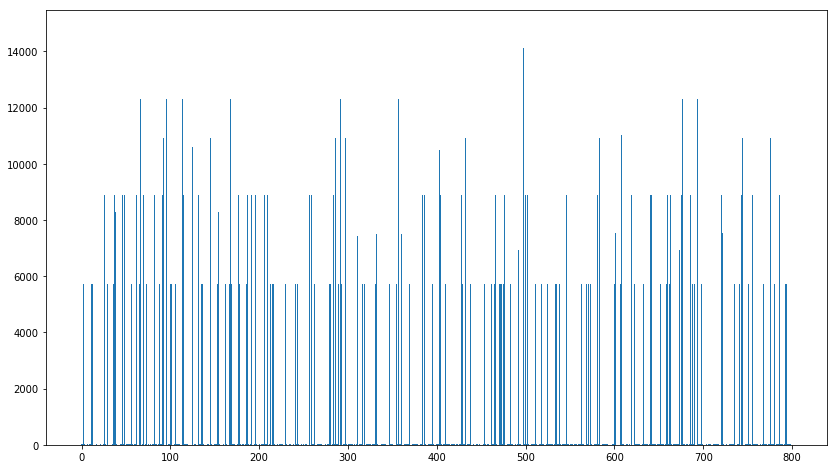

In [10]:
plt.figure(figsize=(14,8))
plt.bar(range(len(iterations_used_per_game)),iterations_used_per_game)

In [30]:
actions_for_each_game[number_of_games+5]

{0: 1, 1: 5712, 2: 2855, 3: 2867, 4: 5710, 5: 2855}

[1, 9, 2, 15, 2, 2]


<BarContainer object of 6 artists>

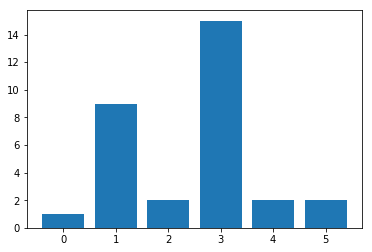

In [24]:
x = 10
mp = actions_for_each_game[x]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [43]:
en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
printing foundation number 2 ********************
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
printing foundation number 4 ********************
